In [6]:
import tkinter as tk
from tkinter import messagebox

class BudgetApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Gestion de Budget des Courses")

        self.items = []

        # Interface
        self.setup_ui()

    def setup_ui(self):
        # Labels
        tk.Label(self.root, text="Article:").grid(row=0, column=0)
        tk.Label(self.root, text="Prix:").grid(row=1, column=0)
        tk.Label(self.root, text="Articles ajoutés:").grid(row=3, column=0)

        # Entry widgets
        self.article_entry = tk.Entry(self.root)
        self.article_entry.grid(row=0, column=1)
        self.price_entry = tk.Entry(self.root)
        self.price_entry.grid(row=1, column=1)

        # Buttons
        tk.Button(self.root, text="Ajouter", command=self.add_item).grid(row=2, column=0)
        tk.Button(self.root, text="Enlever", command=self.remove_item).grid(row=2, column=1)

        # Listbox
        self.items_listbox = tk.Listbox(self.root, width=50)
        self.items_listbox.grid(row=4, column=0, columnspan=2)

        # Total
        self.total_label = tk.Label(self.root, text="Total: 0.0 €")
        self.total_label.grid(row=5, column=0, columnspan=2)

    def add_item(self):
        article = self.article_entry.get()
        price = self.price_entry.get()

        if not article or not price:
            messagebox.showerror("Erreur", "Veuillez entrer un article et un prix.")
            return

        try:
            price = float(price)
        except ValueError:
            messagebox.showerror("Erreur", "Le prix doit être un nombre.")
            return

        self.items.append((article, price))
        self.update_listbox()
        self.update_total()

        self.article_entry.delete(0, tk.END)
        self.price_entry.delete(0, tk.END)

    def remove_item(self):
        selected_indices = self.items_listbox.curselection()
        if not selected_indices:
            messagebox.showerror("Erreur", "Veuillez sélectionner un article à enlever.")
            return

        for index in reversed(selected_indices):
            del self.items[index]

        self.update_listbox()
        self.update_total()

    def update_listbox(self):
        self.items_listbox.delete(0, tk.END)
        for item in self.items:
            self.items_listbox.insert(tk.END, f"{item[0]}: {item[1]:.2f} €")

    def update_total(self):
        total = sum(price for _, price in self.items)
        self.total_label.config(text=f"Total: {total:.2f} €")

if __name__ == "__main__":
    root = tk.Tk()
    app = BudgetApp(root)
    root.mainloop()


KeyboardInterrupt: 

In [13]:
import tkinter as tk
from tkinter import messagebox
import csv

class BudgetApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Gestion de Budget des Courses")

        self.items = []

        # Interface
        self.setup_ui()
        
        # Charger les articles depuis le fichier
        self.load_items()

    def setup_ui(self):
        # Labels
        tk.Label(self.root, text="Article:").grid(row=0, column=0)
        tk.Label(self.root, text="Prix:").grid(row=1, column=0)
        tk.Label(self.root, text="Articles ajoutés:").grid(row=3, column=0)

        # Entry widgets
        self.article_entry = tk.Entry(self.root)
        self.article_entry.grid(row=0, column=1)
        self.price_entry = tk.Entry(self.root)
        self.price_entry.grid(row=1, column=1)

        # Buttons
        tk.Button(self.root, text="Ajouter", command=self.add_item).grid(row=2, column=0)
        tk.Button(self.root, text="Enlever", command=self.remove_item).grid(row=2, column=1)

        # Listbox
        self.items_listbox = tk.Listbox(self.root, width=50)
        self.items_listbox.grid(row=4, column=0, columnspan=2)

        # Total
        self.total_label = tk.Label(self.root, text="Total: 0.0 €")
        self.total_label.grid(row=5, column=0, columnspan=2)

    def add_item(self):
        article = self.article_entry.get()
        price = self.price_entry.get()

        if not article or not price:
            messagebox.showerror("Erreur", "Veuillez entrer un article et un prix.")
            return

        try:
            price = float(price)
        except ValueError:
            messagebox.showerror("Erreur", "Le prix doit être un nombre.")
            return

        self.items.append((article, price))
        self.update_listbox()
        self.update_total()

        self.article_entry.delete(0, tk.END)
        self.price_entry.delete(0, tk.END)

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def remove_item(self):
        selected_indices = self.items_listbox.curselection()
        if not selected_indices:
            messagebox.showerror("Erreur", "Veuillez sélectionner un article à enlever.")
            return

        for index in reversed(selected_indices):
            del self.items[index]

        self.update_listbox()
        self.update_total()

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def update_listbox(self):
        self.items_listbox.delete(0, tk.END)
        for item in self.items:
            self.items_listbox.insert(tk.END, f"{item[0]}: {item[1]:.2f} €")

    def update_total(self):
        total = sum(price for _, price in self.items)
        self.total_label.config(text=f"Total: {total:.2f} €")

    def save_items(self):
        with open("courses.csv", "w", newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Article", "Prix"])
            writer.writerows(self.items)

    def load_items(self):
        try:
            with open("courses.csv", "r") as file:
                reader = csv.reader(file)
                next(reader)  # Skip header row
                self.items = [(row[0], float(row[1])) for row in reader]
            self.update_listbox()
            self.update_total()
        except FileNotFoundError:
            pass

if __name__ == "__main__":
    root = tk.Tk()
    app = BudgetApp(root)
    root.mainloop()


In [18]:
import tkinter as tk
from tkinter import messagebox
import csv

class BudgetApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Gestion de Budget des Courses")

        self.items = []

        # Interface
        self.setup_ui()
        
        # Charger les articles depuis le fichier
        self.load_items()

    def setup_ui(self):
        # Labels
        tk.Label(self.root, text="Article:").grid(row=0, column=0)
        tk.Label(self.root, text="Prix:").grid(row=1, column=0)
        tk.Label(self.root, text="Articles ajoutés:").grid(row=3, column=0)

        # Entry widgets
        self.article_entry = tk.Entry(self.root)
        self.article_entry.grid(row=0, column=1)
        self.price_entry = tk.Entry(self.root)
        self.price_entry.grid(row=1, column=1)

        # Buttons
        tk.Button(self.root, text="Ajouter", command=self.add_item).grid(row=2, column=0)
        tk.Button(self.root, text="Enlever", command=self.remove_item).grid(row=2, column=1)

        # Listbox
        self.items_frame = tk.Frame(self.root)
        self.items_frame.grid(row=4, column=0, columnspan=2)

        # Total
        self.total_label = tk.Label(self.root, text="Total: 0.0 €")
        self.total_label.grid(row=5, column=0, columnspan=2)

    def add_item(self):
        article = self.article_entry.get()
        price = self.price_entry.get()

        if not article or not price:
            messagebox.showerror("Erreur", "Veuillez entrer un article et un prix.")
            return

        try:
            price = float(price)
        except ValueError:
            messagebox.showerror("Erreur", "Le prix doit être un nombre.")
            return

        self.items.append((article, price, False))
        self.update_listbox()
        self.update_total()

        self.article_entry.delete(0, tk.END)
        self.price_entry.delete(0, tk.END)

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def remove_item(self):
        selected_indices = [index for index, var in enumerate(self.check_vars) if var.get()]
        if not selected_indices:
            messagebox.showerror("Erreur", "Veuillez sélectionner un article à enlever.")
            return

        for index in reversed(selected_indices):
            del self.items[index]

        self.update_listbox()
        self.update_total()

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def update_listbox(self):
        for widget in self.items_frame.winfo_children():
            widget.destroy()

        self.check_vars = []
        for item in self.items:
            var = tk.BooleanVar(value=item[2])
            chk = tk.Checkbutton(self.items_frame, text=f"{item[0]}: {item[1]:.2f} €", variable=var, command=self.update_item_status)
            chk.pack(anchor="w")
            self.check_vars.append(var)

    def update_item_status(self):
        for index, var in enumerate(self.check_vars):
            self.items[index] = (self.items[index][0], self.items[index][1], var.get())
        self.save_items()

    def update_total(self):
        total = sum(price for _, price, _ in self.items)
        self.total_label.config(text=f"Total: {total:.2f} €")

    def save_items(self):
        with open("courses.csv", "w", newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Article", "Prix", "Achete"])
            writer.writerows(self.items)

    def load_items(self):
        try:
            with open("courses.csv", "r") as file:
                reader = csv.reader(file)
                next(reader)  # Skip header row
                self.items = [
                    (row[0], float(row[1]), row[2] == 'True') 
                    for row in reader if len(row) == 3
                ]
            self.update_listbox()
            self.update_total()
        except FileNotFoundError:
            pass

if __name__ == "__main__":
    root = tk.Tk()
    app = BudgetApp(root)
    root.mainloop()


2024-07-14 20:48:54.284 python[69860:1824080] Warning: Expected min height of view: (<NSButton: 0x7fc312f0b8f0>) to be less than or equal to 30 but got a height of 32.000000. This error will be logged once per view in violation.


In [20]:
import tkinter as tk
from tkinter import messagebox
import csv

class BudgetApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Gestion de Budget des Courses")

        self.items = []
        self.budget = 0.0

        # Interface
        self.setup_ui()
        
        # Charger les articles depuis le fichier
        self.load_items()

    def setup_ui(self):
        # Labels
        tk.Label(self.root, text="Article:").grid(row=0, column=0)
        tk.Label(self.root, text="Prix:").grid(row=1, column=0)
        tk.Label(self.root, text="Budget:").grid(row=2, column=0)
        tk.Label(self.root, text="Articles ajoutés:").grid(row=4, column=0)

        # Entry widgets
        self.article_entry = tk.Entry(self.root)
        self.article_entry.grid(row=0, column=1)
        self.price_entry = tk.Entry(self.root)
        self.price_entry.grid(row=1, column=1)
        self.budget_entry = tk.Entry(self.root)
        self.budget_entry.grid(row=2, column=1)

        # Buttons
        tk.Button(self.root, text="Ajouter", command=self.add_item).grid(row=3, column=0)
        tk.Button(self.root, text="Enlever", command=self.remove_item).grid(row=3, column=1)
        tk.Button(self.root, text="Définir le budget", command=self.set_budget).grid(row=2, column=2)

        # Listbox
        self.items_frame = tk.Frame(self.root)
        self.items_frame.grid(row=5, column=0, columnspan=3)

        # Total
        self.total_label = tk.Label(self.root, text="Total: 0.0 €")
        self.total_label.grid(row=6, column=0, columnspan=2)

        # Budget remaining
        self.budget_label = tk.Label(self.root, text="Reste sur le budget: 0.0 €")
        self.budget_label.grid(row=6, column=2, columnspan=2)

    def add_item(self):
        article = self.article_entry.get()
        price = self.price_entry.get()

        if not article or not price:
            messagebox.showerror("Erreur", "Veuillez entrer un article et un prix.")
            return

        try:
            price = float(price)
        except ValueError:
            messagebox.showerror("Erreur", "Le prix doit être un nombre.")
            return

        self.items.append((article, price, False))
        self.update_listbox()
        self.update_total()

        self.article_entry.delete(0, tk.END)
        self.price_entry.delete(0, tk.END)

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def remove_item(self):
        selected_indices = [index for index, var in enumerate(self.check_vars) if var.get()]
        if not selected_indices:
            messagebox.showerror("Erreur", "Veuillez sélectionner un article à enlever.")
            return

        for index in reversed(selected_indices):
            del self.items[index]

        self.update_listbox()
        self.update_total()

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def update_listbox(self):
        for widget in self.items_frame.winfo_children():
            widget.destroy()

        self.check_vars = []
        for item in self.items:
            var = tk.BooleanVar(value=item[2])
            chk = tk.Checkbutton(self.items_frame, text=f"{item[0]}: {item[1]:.2f} €", variable=var, command=self.update_item_status)
            chk.pack(anchor="w")
            self.check_vars.append(var)

    def update_item_status(self):
        for index, var in enumerate(self.check_vars):
            self.items[index] = (self.items[index][0], self.items[index][1], var.get())
        self.save_items()

    def update_total(self):
        total = sum(price for _, price, _ in self.items)
        self.total_label.config(text=f"Total: {total:.2f} €")
        remaining_budget = self.budget - total
        self.budget_label.config(text=f"Reste sur le budget: {remaining_budget:.2f} €")

    def set_budget(self):
        budget = self.budget_entry.get()

        try:
            self.budget = float(budget)
        except ValueError:
            messagebox.showerror("Erreur", "Le budget doit être un nombre.")
            return

        self.update_total()
        self.budget_entry.delete(0, tk.END)

    def save_items(self):
        with open("courses.csv", "w", newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Article", "Prix", "Achete"])
            writer.writerows(self.items)
            writer.writerow(["Budget", self.budget, ""])

    def load_items(self):
        try:
            with open("courses.csv", "r") as file:
                reader = csv.reader(file)
                next(reader)  # Skip header row
                self.items = [
                    (row[0], float(row[1]), row[2] == 'True') 
                    for row in reader if len(row) == 3 and row[0] != "Budget"
                ]
                for row in reader:
                    if row[0] == "Budget":
                        self.budget = float(row[1])
            self.update_listbox()
            self.update_total()
        except FileNotFoundError:
            pass

if __name__ == "__main__":
    root = tk.Tk()
    app = BudgetApp(root)
    root.mainloop()


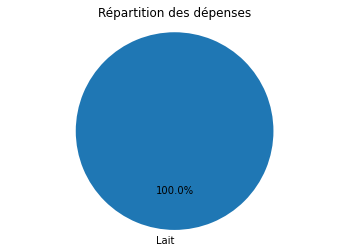

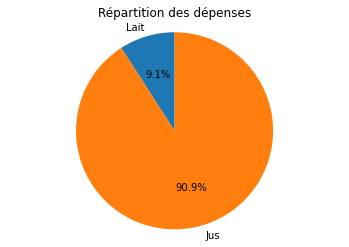

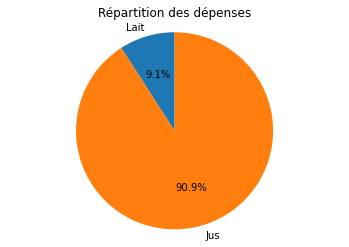

In [21]:
import tkinter as tk
from tkinter import messagebox
import csv
import matplotlib.pyplot as plt

class BudgetApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Gestion de Budget des Courses")

        self.items = []
        self.budget = 0.0

        # Interface
        self.setup_ui()
        
        # Charger les articles depuis le fichier
        self.load_items()

    def setup_ui(self):
        # Labels
        tk.Label(self.root, text="Article:").grid(row=0, column=0)
        tk.Label(self.root, text="Prix:").grid(row=1, column=0)
        tk.Label(self.root, text="Budget:").grid(row=2, column=0)
        tk.Label(self.root, text="Articles ajoutés:").grid(row=4, column=0)

        # Entry widgets
        self.article_entry = tk.Entry(self.root)
        self.article_entry.grid(row=0, column=1)
        self.price_entry = tk.Entry(self.root)
        self.price_entry.grid(row=1, column=1)
        self.budget_entry = tk.Entry(self.root)
        self.budget_entry.grid(row=2, column=1)

        # Buttons
        tk.Button(self.root, text="Ajouter", command=self.add_item).grid(row=3, column=0)
        tk.Button(self.root, text="Enlever", command=self.remove_item).grid(row=3, column=1)
        tk.Button(self.root, text="Définir le budget", command=self.set_budget).grid(row=2, column=2)
        tk.Button(self.root, text="Afficher le diagramme", command=self.show_pie_chart).grid(row=3, column=2)

        # Listbox
        self.items_frame = tk.Frame(self.root)
        self.items_frame.grid(row=5, column=0, columnspan=3)

        # Total
        self.total_label = tk.Label(self.root, text="Total: 0.0 €")
        self.total_label.grid(row=6, column=0, columnspan=2)

        # Budget remaining
        self.budget_label = tk.Label(self.root, text="Reste sur le budget: 0.0 €")
        self.budget_label.grid(row=6, column=2, columnspan=2)

    def add_item(self):
        article = self.article_entry.get()
        price = self.price_entry.get()

        if not article or not price:
            messagebox.showerror("Erreur", "Veuillez entrer un article et un prix.")
            return

        try:
            price = float(price)
        except ValueError:
            messagebox.showerror("Erreur", "Le prix doit être un nombre.")
            return

        self.items.append((article, price, False))
        self.update_listbox()
        self.update_total()

        self.article_entry.delete(0, tk.END)
        self.price_entry.delete(0, tk.END)

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def remove_item(self):
        selected_indices = [index for index, var in enumerate(self.check_vars) if var.get()]
        if not selected_indices:
            messagebox.showerror("Erreur", "Veuillez sélectionner un article à enlever.")
            return

        for index in reversed(selected_indices):
            del self.items[index]

        self.update_listbox()
        self.update_total()

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def update_listbox(self):
        for widget in self.items_frame.winfo_children():
            widget.destroy()

        self.check_vars = []
        for item in self.items:
            var = tk.BooleanVar(value=item[2])
            chk = tk.Checkbutton(self.items_frame, text=f"{item[0]}: {item[1]:.2f} €", variable=var, command=self.update_item_status)
            chk.pack(anchor="w")
            self.check_vars.append(var)

    def update_item_status(self):
        for index, var in enumerate(self.check_vars):
            self.items[index] = (self.items[index][0], self.items[index][1], var.get())
        self.save_items()

    def update_total(self):
        total = sum(price for _, price, _ in self.items)
        self.total_label.config(text=f"Total: {total:.2f} €")
        remaining_budget = self.budget - total
        self.budget_label.config(text=f"Reste sur le budget: {remaining_budget:.2f} €")

    def set_budget(self):
        budget = self.budget_entry.get()

        try:
            self.budget = float(budget)
        except ValueError:
            messagebox.showerror("Erreur", "Le budget doit être un nombre.")
            return

        self.update_total()
        self.budget_entry.delete(0, tk.END)

    def save_items(self):
        with open("courses.csv", "w", newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Article", "Prix", "Achete"])
            writer.writerows(self.items)
            writer.writerow(["Budget", self.budget, ""])

    def load_items(self):
        try:
            with open("courses.csv", "r") as file:
                reader = csv.reader(file)
                next(reader)  # Skip header row
                self.items = [
                    (row[0], float(row[1]), row[2] == 'True') 
                    for row in reader if len(row) == 3 and row[0] != "Budget"
                ]
                for row in reader:
                    if row[0] == "Budget":
                        self.budget = float(row[1])
            self.update_listbox()
            self.update_total()
        except FileNotFoundError:
            pass

    def show_pie_chart(self):
        if not self.items:
            messagebox.showerror("Erreur", "Aucun article à afficher dans le diagramme.")
            return

        labels = [item[0] for item in self.items]
        sizes = [item[1] for item in self.items]

        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        plt.title("Répartition des dépenses")
        plt.show()

if __name__ == "__main__":
    root = tk.Tk()
    app = BudgetApp(root)
    root.mainloop()


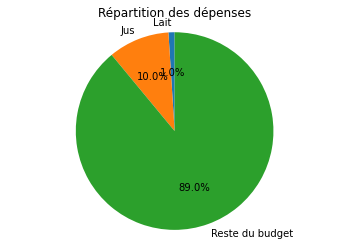

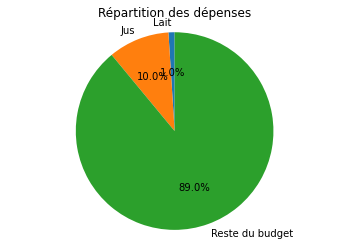

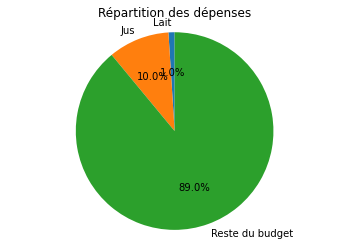

In [22]:
import tkinter as tk
from tkinter import messagebox
import csv
import matplotlib.pyplot as plt

class BudgetApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Gestion de Budget des Courses")

        self.items = []
        self.budget = 0.0

        # Interface
        self.setup_ui()
        
        # Charger les articles depuis le fichier
        self.load_items()

    def setup_ui(self):
        # Labels
        tk.Label(self.root, text="Article:").grid(row=0, column=0)
        tk.Label(self.root, text="Prix:").grid(row=1, column=0)
        tk.Label(self.root, text="Budget:").grid(row=2, column=0)
        tk.Label(self.root, text="Articles ajoutés:").grid(row=4, column=0)

        # Entry widgets
        self.article_entry = tk.Entry(self.root)
        self.article_entry.grid(row=0, column=1)
        self.price_entry = tk.Entry(self.root)
        self.price_entry.grid(row=1, column=1)
        self.budget_entry = tk.Entry(self.root)
        self.budget_entry.grid(row=2, column=1)

        # Buttons
        tk.Button(self.root, text="Ajouter", command=self.add_item).grid(row=3, column=0)
        tk.Button(self.root, text="Enlever", command=self.remove_item).grid(row=3, column=1)
        tk.Button(self.root, text="Définir le budget", command=self.set_budget).grid(row=2, column=2)
        tk.Button(self.root, text="Afficher le diagramme", command=self.show_pie_chart).grid(row=3, column=2)

        # Listbox
        self.items_frame = tk.Frame(self.root)
        self.items_frame.grid(row=5, column=0, columnspan=3)

        # Total
        self.total_label = tk.Label(self.root, text="Total: 0.0 €")
        self.total_label.grid(row=6, column=0, columnspan=2)

        # Budget remaining
        self.budget_label = tk.Label(self.root, text="Reste sur le budget: 0.0 €")
        self.budget_label.grid(row=6, column=2, columnspan=2)

    def add_item(self):
        article = self.article_entry.get()
        price = self.price_entry.get()

        if not article or not price:
            messagebox.showerror("Erreur", "Veuillez entrer un article et un prix.")
            return

        try:
            price = float(price)
        except ValueError:
            messagebox.showerror("Erreur", "Le prix doit être un nombre.")
            return

        self.items.append((article, price, False))
        self.update_listbox()
        self.update_total()

        self.article_entry.delete(0, tk.END)
        self.price_entry.delete(0, tk.END)

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def remove_item(self):
        selected_indices = [index for index, var in enumerate(self.check_vars) if var.get()]
        if not selected_indices:
            messagebox.showerror("Erreur", "Veuillez sélectionner un article à enlever.")
            return

        for index in reversed(selected_indices):
            del self.items[index]

        self.update_listbox()
        self.update_total()

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def update_listbox(self):
        for widget in self.items_frame.winfo_children():
            widget.destroy()

        self.check_vars = []
        for item in self.items:
            var = tk.BooleanVar(value=item[2])
            chk = tk.Checkbutton(self.items_frame, text=f"{item[0]}: {item[1]:.2f} €", variable=var, command=self.update_item_status)
            chk.pack(anchor="w")
            self.check_vars.append(var)

    def update_item_status(self):
        for index, var in enumerate(self.check_vars):
            self.items[index] = (self.items[index][0], self.items[index][1], var.get())
        self.save_items()

    def update_total(self):
        total = sum(price for _, price, _ in self.items)
        self.total_label.config(text=f"Total: {total:.2f} €")
        remaining_budget = self.budget - total
        self.budget_label.config(text=f"Reste sur le budget: {remaining_budget:.2f} €")

    def set_budget(self):
        budget = self.budget_entry.get()

        try:
            self.budget = float(budget)
        except ValueError:
            messagebox.showerror("Erreur", "Le budget doit être un nombre.")
            return

        self.update_total()
        self.budget_entry.delete(0, tk.END)

    def save_items(self):
        with open("courses.csv", "w", newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Article", "Prix", "Achete"])
            writer.writerows(self.items)
            writer.writerow(["Budget", self.budget, ""])

    def load_items(self):
        try:
            with open("courses.csv", "r") as file:
                reader = csv.reader(file)
                next(reader)  # Skip header row
                self.items = [
                    (row[0], float(row[1]), row[2] == 'True') 
                    for row in reader if len(row) == 3 and row[0] != "Budget"
                ]
                for row in reader:
                    if row[0] == "Budget":
                        self.budget = float(row[1])
            self.update_listbox()
            self.update_total()
        except FileNotFoundError:
            pass

    def show_pie_chart(self):
        if not self.items:
            messagebox.showerror("Erreur", "Aucun article à afficher dans le diagramme.")
            return

        labels = [item[0] for item in self.items]
        sizes = [item[1] for item in self.items]

        total_spent = sum(sizes)
        remaining_budget = self.budget - total_spent

        if remaining_budget > 0:
            labels.append("Reste du budget")
            sizes.append(remaining_budget)

        fig, ax = plt.subplots()
        ax.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90)
        ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        plt.title("Répartition des dépenses")
        plt.show()

if __name__ == "__main__":
    root = tk.Tk()
    app = BudgetApp(root)
    root.mainloop()


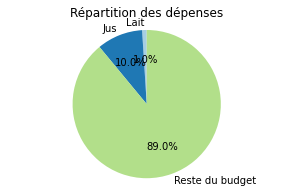

In [23]:
import tkinter as tk
from tkinter import messagebox
import csv
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg

class BudgetApp:
    def __init__(self, root):
        self.root = root
        self.root.title("Gestion de Budget des Courses")

        self.items = []
        self.budget = 0.0

        # Interface
        self.setup_ui()
        
        # Charger les articles depuis le fichier
        self.load_items()

    def setup_ui(self):
        # Labels
        tk.Label(self.root, text="Article:").grid(row=0, column=0)
        tk.Label(self.root, text="Prix:").grid(row=1, column=0)
        tk.Label(self.root, text="Budget:").grid(row=2, column=0)
        tk.Label(self.root, text="Articles ajoutés:").grid(row=4, column=0)

        # Entry widgets
        self.article_entry = tk.Entry(self.root)
        self.article_entry.grid(row=0, column=1)
        self.price_entry = tk.Entry(self.root)
        self.price_entry.grid(row=1, column=1)
        self.budget_entry = tk.Entry(self.root)
        self.budget_entry.grid(row=2, column=1)

        # Buttons
        tk.Button(self.root, text="Ajouter", command=self.add_item).grid(row=3, column=0)
        tk.Button(self.root, text="Enlever", command=self.remove_item).grid(row=3, column=1)
        tk.Button(self.root, text="Définir le budget", command=self.set_budget).grid(row=2, column=2)
        tk.Button(self.root, text="Afficher le diagramme", command=self.update_pie_chart).grid(row=3, column=2)

        # Listbox
        self.items_frame = tk.Frame(self.root)
        self.items_frame.grid(row=5, column=0, columnspan=3)

        # Total
        self.total_label = tk.Label(self.root, text="Total: 0.0 €")
        self.total_label.grid(row=6, column=0, columnspan=2)

        # Budget remaining
        self.budget_label = tk.Label(self.root, text="Reste sur le budget: 0.0 €")
        self.budget_label.grid(row=6, column=2, columnspan=2)

        # Frame for the pie chart
        self.pie_chart_frame = tk.Frame(self.root)
        self.pie_chart_frame.grid(row=7, column=0, columnspan=3)

        # Create initial empty plot
        self.fig, self.ax = plt.subplots(figsize=(5, 3))
        self.pie_chart = FigureCanvasTkAgg(self.fig, master=self.pie_chart_frame)
        self.pie_chart.get_tk_widget().pack()

    def add_item(self):
        article = self.article_entry.get()
        price = self.price_entry.get()

        if not article or not price:
            messagebox.showerror("Erreur", "Veuillez entrer un article et un prix.")
            return

        try:
            price = float(price)
        except ValueError:
            messagebox.showerror("Erreur", "Le prix doit être un nombre.")
            return

        self.items.append((article, price, False))
        self.update_listbox()
        self.update_total()

        self.article_entry.delete(0, tk.END)
        self.price_entry.delete(0, tk.END)

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def remove_item(self):
        selected_indices = [index for index, var in enumerate(self.check_vars) if var.get()]
        if not selected_indices:
            messagebox.showerror("Erreur", "Veuillez sélectionner un article à enlever.")
            return

        for index in reversed(selected_indices):
            del self.items[index]

        self.update_listbox()
        self.update_total()

        # Sauvegarder les articles dans le fichier
        self.save_items()

    def update_listbox(self):
        for widget in self.items_frame.winfo_children():
            widget.destroy()

        self.check_vars = []
        for item in self.items:
            var = tk.BooleanVar(value=item[2])
            chk = tk.Checkbutton(self.items_frame, text=f"{item[0]}: {item[1]:.2f} €", variable=var, command=self.update_item_status)
            chk.pack(anchor="w")
            self.check_vars.append(var)

    def update_item_status(self):
        for index, var in enumerate(self.check_vars):
            self.items[index] = (self.items[index][0], self.items[index][1], var.get())
        self.save_items()

    def update_total(self):
        total = sum(price for _, price, _ in self.items)
        self.total_label.config(text=f"Total: {total:.2f} €")
        remaining_budget = self.budget - total
        self.budget_label.config(text=f"Reste sur le budget: {remaining_budget:.2f} €")

        # Mettre à jour le diagramme
        self.update_pie_chart()

    def set_budget(self):
        budget = self.budget_entry.get()

        try:
            self.budget = float(budget)
        except ValueError:
            messagebox.showerror("Erreur", "Le budget doit être un nombre.")
            return

        self.update_total()
        self.budget_entry.delete(0, tk.END)

    def save_items(self):
        with open("courses.csv", "w", newline='') as file:
            writer = csv.writer(file)
            writer.writerow(["Article", "Prix", "Achete"])
            writer.writerows(self.items)
            writer.writerow(["Budget", self.budget, ""])

    def load_items(self):
        try:
            with open("courses.csv", "r") as file:
                reader = csv.reader(file)
                next(reader)  # Skip header row
                self.items = [
                    (row[0], float(row[1]), row[2] == 'True') 
                    for row in reader if len(row) == 3 and row[0] != "Budget"
                ]
                for row in reader:
                    if row[0] == "Budget":
                        self.budget = float(row[1])
            self.update_listbox()
            self.update_total()
        except FileNotFoundError:
            pass

    def update_pie_chart(self):
        # Efface l'ancien graphique
        self.ax.clear()

        if not self.items:
            self.ax.pie([1], labels=["Aucun article"], colors=["lightgrey"], autopct='%1.1f%%', startangle=90)
        else:
            labels = [item[0] for item in self.items]
            sizes = [item[1] for item in self.items]

            total_spent = sum(sizes)
            remaining_budget = self.budget - total_spent

            if remaining_budget > 0:
                labels.append("Reste du budget")
                sizes.append(remaining_budget)
                colors = plt.cm.Paired(range(len(labels)))  # Use a colormap to generate colors
            else:
                colors = plt.cm.Paired(range(len(labels)))

            self.ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
            self.ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

        self.ax.set_title("Répartition des dépenses")
        self.pie_chart.draw()

if __name__ == "__main__":
    root = tk.Tk()
    app = BudgetApp(root)
    root.mainloop()


In [ ]:
Bud